# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate

In [2]:
#Import the model
expected_model_version = '1.0'
model_path = '../models/car_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

# Load Data

In [3]:
car_data = pd.read_csv('../data/car_data_cleaned.csv')

In [4]:
samples_original = pd.read_csv('../data/sample_customized_cars.csv')

In [5]:
#The data for sample files is scraped from the Internet
samples_original

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,Audi,Q5,2021,premium unleaded (required),261.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,0,0,0,1,0
1,Toyota,Corolla,2021,regular unleaded,139.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,...,0,0,0,0,0,0,0,0,0,0


 # Transform the Sample Data

In [6]:
samples = pd.get_dummies(samples_original)
samples.head().T

,0,1
Year,2021.0,2021.0
Engine HP,261.0,139.0
Engine Cylinders,4.0,4.0
Number of Doors,4.0,4.0
highway MPG,28.0,38.0
city mpg,23.0,30.0
Popularity,3105.0,2031.0
MSRP,43300.0,20025.0
Crossover,1.0,0.0
Diesel,0.0,0.0


In [7]:
X = pd.get_dummies(car_data)
X.head().T

,0,1,2,3,4
Year,2011.0,2011.0,2011.0,2011.0,2011.0
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Number of Doors,2.0,2.0,2.0,2.0,2.0
highway MPG,26.0,28.0,28.0,28.0,28.0
...,...,...,...,...,...
Vehicle Style_Passenger Minivan,0.0,0.0,0.0,0.0,0.0
Vehicle Style_Passenger Van,0.0,0.0,0.0,0.0,0.0
Vehicle Style_Regular Cab Pickup,0.0,0.0,0.0,0.0,0.0
Vehicle Style_Sedan,0.0,0.0,0.0,0.0,0.0


In [8]:
#Pick a few row randomly from the original data
drop_indices = np.random.choice(X.index, 10, replace=False)
sample_fortest = X.iloc[drop_indices]
X = X.drop(drop_indices)

sample_original

In [9]:
#Assemble samples from original data to the samples
samples_comb = sample_fortest.merge(samples, how='outer')
samples_comb = samples_comb.fillna(0)
samples_comb

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Crossover,Diesel,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2016,350.0,6.0,2.0,27,19,1715,94800,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,2017,325.0,6.0,4.0,23,18,5657,43490,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0
2,2015,150.0,4.0,4.0,35,24,204,31750,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
3,2017,365.0,6.0,4.0,20,15,5657,62590,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2006,390.0,8.0,2.0,17,12,238,79900,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5,2003,165.0,6.0,4.0,19,15,436,25217,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,2016,148.0,4.0,4.0,37,28,640,23095,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7,2016,276.0,6.0,4.0,22,17,1720,39900,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0
8,2009,200.0,4.0,4.0,29,22,873,25870,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
9,2008,127.0,4.0,4.0,27,19,481,15389,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0


In [10]:
y = X.MSRP
X = X.drop(columns='MSRP')
y_test = samples_comb.MSRP
X_test = samples_comb.drop(columns='MSRP')

In [11]:
X.shape, X_test.shape

((11189, 1018), (12, 1018))

In [12]:
y.shape, y_test.shape

((11189,), (12,))

In [13]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=8.0, n_estimators=316,
                                       n_jobs=-1, random_state=47))])

In [14]:
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [15]:
cv_results['test_score']

array([-10876.70843353,  -8772.23700651,  -7981.51478886,  -8007.56466064,
        -8935.65515389])

In [16]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(8914.736008684664, 1054.8877733634379)

# Calculate Expected Car Price from the Model

In [17]:
MSRP_pred = model.predict(X_test)

In [18]:
MSRP_pred = pd.Series(MSRP_pred, name="Predicted")

In [19]:
diff = MSRP_pred-y_test
diff.name="Difference"
perc_diff = diff/y_test*100
perc_diff.name = '% Diff'

Price_diff = pd.concat([pd.concat([pd.concat([y_test, MSRP_pred],axis=1),diff],axis=1),perc_diff], axis=1)
Price_diff

,MSRP,Predicted,Difference,% Diff
0,94800,96503.282268,1703.282268,1.796711
1,43490,36373.103868,-7116.896132,-16.364443
2,31750,22198.534054,-9551.465946,-30.083357
3,62590,54679.427274,-7910.572726,-12.638717
4,79900,93069.432658,13169.432658,16.482394
5,25217,22102.201316,-3114.798684,-12.351980
6,23095,20543.876269,-2551.123731,-11.046217
7,39900,34579.473890,-5320.526110,-13.334652
8,25870,28018.824537,2148.824537,8.306241
9,15389,16324.464220,935.464220,6.078785


<AxesSubplot:ylabel='% Diff'>

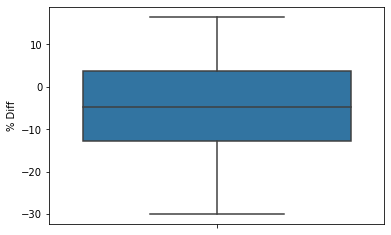

In [20]:
sns.boxplot(y='% Diff', data=Price_diff)

The model performance is generally good. The first quartile to the third quartile is about -13% to 4%. The range of the difference varies quite a bit. However, those two cases from the sample file perform really good. The difference is only a few hundred dollars. 

# Prediction without brands and model names

In [21]:
samples_mod = samples_original.drop(['MSRP','Make','Model'],axis=1)

In [22]:
X_mod = car_data.drop(['MSRP','Make','Model'],axis=1)

In [23]:
X_mod = pd.get_dummies(X_mod)
samples_mod = pd.get_dummies(samples_mod)
X_mod

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Crossover,Diesel,Exotic,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,2012,300.0,6.0,4.0,23,16,204,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11195,2012,300.0,6.0,4.0,23,16,204,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11196,2012,300.0,6.0,4.0,23,16,204,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11197,2013,300.0,6.0,4.0,23,16,204,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
new_sample_fortest = X_mod.iloc[drop_indices]
X_mod = X_mod.drop(drop_indices)

In [25]:
new_samples_comb = new_sample_fortest.merge(samples_mod, how='outer')
new_samples_comb = new_samples_comb.fillna(0)
new_samples_comb

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Crossover,Diesel,Exotic,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2016,350.0,6.0,2.0,27,19,1715,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,2017,325.0,6.0,4.0,23,18,5657,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0
2,2015,150.0,4.0,4.0,35,24,204,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
3,2017,365.0,6.0,4.0,20,15,5657,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2006,390.0,8.0,2.0,17,12,238,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5,2003,165.0,6.0,4.0,19,15,436,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,2016,148.0,4.0,4.0,37,28,640,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7,2016,276.0,6.0,4.0,22,17,1720,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0
8,2009,200.0,4.0,4.0,29,22,873,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
9,2008,127.0,4.0,4.0,27,19,481,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0


In [26]:
model.fit(X_mod, y)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=8.0, n_estimators=316,
                                       n_jobs=-1, random_state=47))])

In [27]:
cv_results = cross_validate(model, X_mod, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [28]:
cv_results['test_score']

array([-13113.74112756,  -9473.4165696 ,  -8400.2203057 ,  -7906.02487835,
        -8590.77977738])

In [29]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(9496.836531718476, 1878.1232683604692)

In [30]:
new_MSRP_pred = model.predict(new_samples_comb)

In [31]:
MSRP_pred = pd.Series(new_MSRP_pred, name="Predicted")
diff = MSRP_pred-y_test
diff.name="Difference"
perc_diff = diff/y_test*100
perc_diff.name = '% Diff'

new_Price_diff = pd.concat([pd.concat([pd.concat([y_test, MSRP_pred],axis=1),diff],axis=1),perc_diff], axis=1)
new_Price_diff

,MSRP,Predicted,Difference,% Diff
0,94800,82023.542381,-12776.457619,-13.477276
1,43490,36463.127282,-7026.872718,-16.157445
2,31750,22242.631186,-9507.368814,-29.944469
3,62590,54681.411487,-7908.588513,-12.635546
4,79900,88850.728564,8950.728564,11.202414
5,25217,22099.034152,-3117.965848,-12.364539
6,23095,20549.768692,-2545.231308,-11.020703
7,39900,34607.209257,-5292.790743,-13.265140
8,25870,27963.224805,2093.224805,8.091321
9,15389,16330.682164,941.682164,6.119190


# Compare two models

In [32]:
pd.concat([Price_diff['% Diff'],new_Price_diff['% Diff']], axis=1)

,% Diff,% Diff
0,1.796711,-13.477276
1,-16.364443,-16.157445
2,-30.083357,-29.944469
3,-12.638717,-12.635546
4,16.482394,11.202414
5,-12.351980,-12.364539
6,-11.046217,-11.020703
7,-13.334652,-13.265140
8,8.306241,8.091321
9,6.078785,6.119190


It seems like the model performs slightly better without the model and brand information, but the differences are relatively small. For those mannualy picked samples, the error tend out to be the smallest.